<a href="https://colab.research.google.com/github/DancesWChickens/DBSA-UTAustiin/blob/main/PYF_Project_LearnerNotebook_FullCode_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
#!pip install nbconvert

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# convert ipnb to HTML file
!jupyter nbconvert PYF_Project_LearnerNotebook_FullCode_Final.ipynb --to html

[NbConvertApp] Converting notebook PYF_Project_LearnerNotebook_FullCode_Final.ipynb to html
[NbConvertApp] Writing 1072382 bytes to PYF_Project_LearnerNotebook_FullCode_Final.html


In [ ]:

# Write your code here to read the data
data = pd.read_csv('/content/drive/My Drive/UTAustinDataScience/datafiles/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### **Observations:**
There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
data['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [ ]:
data['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
data['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### **Observations:**
There are 4 integer columns, one float column and 4 of dtype "object."

*   restaurant_name is being used to store strings and some of the restaurant names have what appear to be international characters.
*   cuisine_type stores strings
*   day_of_the_week contains two string values: "Weekend" and "Weekday"
*   rating has a mix of string and numeric values: 'Not given', '5', '3', '4'
*   order_id and customer_id need to be converted to non-numeric values.
*   We will need to look at the volume of "Not given" ratings in future questions.

In [ ]:
#Converting order_id and customer_id to strings
data['order_id'] = data[['order_id']].astype(str)
data['customer_id'] = data[['customer_id']].astype(str)


In [ ]:
#checking that the conversion worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# get missing data by columns
data.isnull().sum(axis=0)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
data.isnull().values.sum()

0

In [ ]:
# reimporting the data with nan values. I don't want to drop the missing values
# without understanding the impact.
orderdata = pd.read_csv('/content/drive/My Drive/UTAustinDataScience/datafiles/foodhub_order.csv', na_values="Not given")

#### **Observations:**
There are no missing (null) values, but there are ratings marked as "Not Given" which indicates a missing rating value. To deal with this, I will create a copy of the dataframe with the "Not Given" values converted to NAN.

In [ ]:
#repeating the data conversions we did before on the copied dataframe
orderdata['order_id'] = orderdata[['order_id']].astype(str)
orderdata['customer_id'] = orderdata[['customer_id']].astype(str)


In [ ]:
orderdata['rating'].dtype
# now that there are no more strings in the rating data without "Not Given" as a
# value, the dataframe has automatically recognized this as a numeric (float)
# datatype

dtype('float64')

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
orderdata.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1162.0,4.344234,0.741478,3.00,4.00,5.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### **Observations**:
**Minimum time**: 20 minutes

**Average time**: 27.37 minutes

**Maximum**: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#We converted not given ratings to NA, so we have to count isna()
na_count = orderdata['rating'].isna().sum()
print("NA values in the rating column:\n", na_count)

NA values in the rating column:
 736


#### **Observations**:
**There are 736 orders that are not rated.** Since that represents 39% of the data, we should not just blindly filter out those orders by dropping the associated rows or dropping the column.

It is hard to believe that there are no one-star and two star ratings. Generally speaking, if people are dissatisfied with the product or the service, they will let you know with a bad rating. Therefore, when I do the multivariate analysis, I am going to assign zeros to the "Not given" ratings, just for the purpose of argument and in order to have a numeric value that we can check for correlation with other variables.


### **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

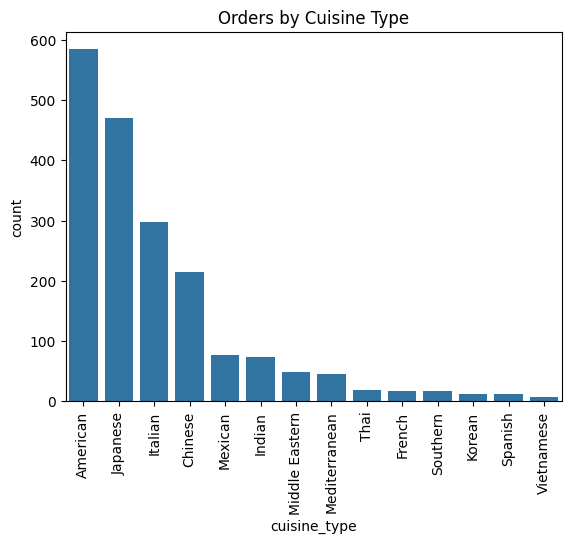

In [ ]:
# Looking at cuisine type with countplot since it is for categorical data
# Calculate frequencies and sort by frequency in descending order
category_order = orderdata['cuisine_type'].value_counts().index

# Create a countplot with seaborn
sns.countplot(data=orderdata, x='cuisine_type', order=category_order)
plt.xticks(rotation=90)
plt.title('Orders by Cuisine Type')
plt.show()

#####**Observation:**
American is the most popular cuisine type, followed by Japanese and Italian.

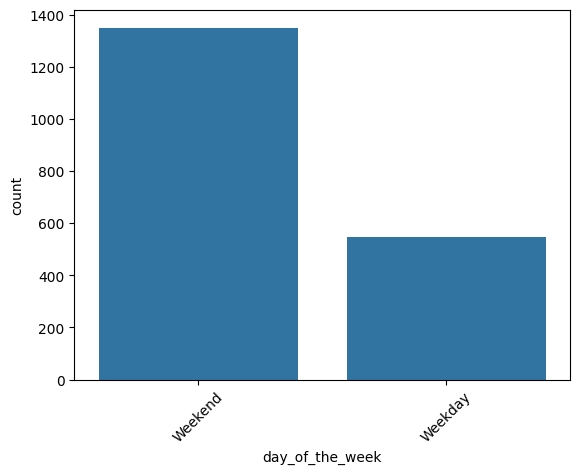

In [ ]:
sns.countplot(data=orderdata,x='day_of_the_week')
plt.xticks(rotation=45)
plt.show()

#####**Observation:**
Approximately twice as many orders happen on the weekends than on weekdays.

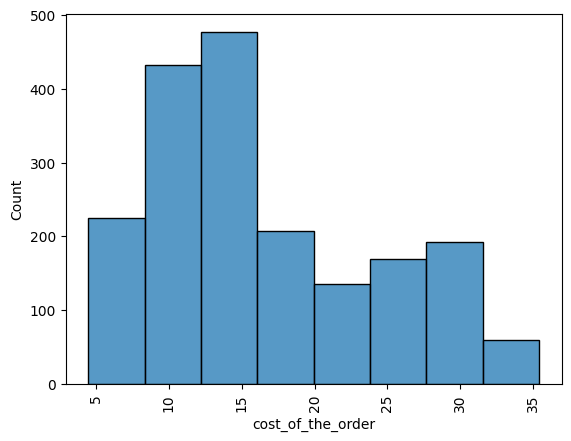

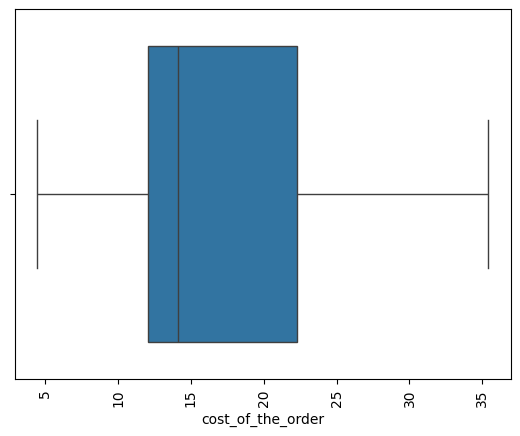

In [ ]:
# Looking at cost
#adjusting number of bins so plot makes more sense to read
sns.histplot(data=orderdata,x='cost_of_the_order', bins=8)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=orderdata,x='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

#####**Observation:**
The majority of the orders cost been 12.00 and 22.00. The median is around 14.00

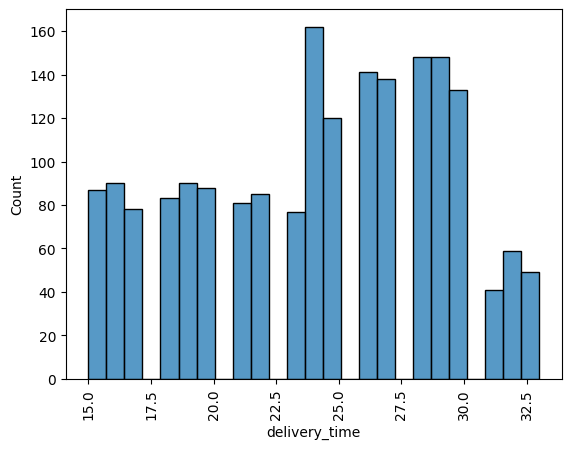

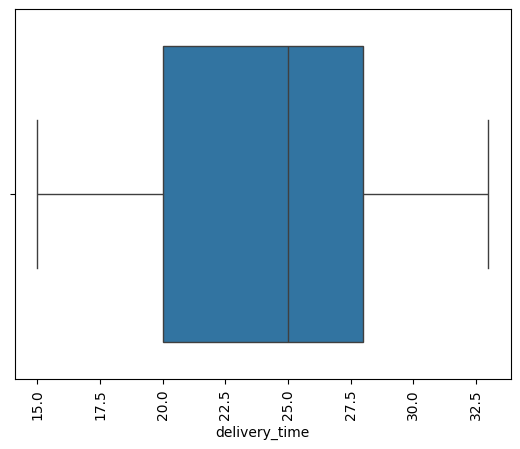

In [ ]:
####Delivery Time

sns.histplot(data=orderdata,x='delivery_time', bins=25)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=orderdata,x='delivery_time')
plt.xticks(rotation=90)
plt.show()




#####**Observation**:
Delivery time tends to be between 20 and 28 minutes, with a median of 25 minutes.

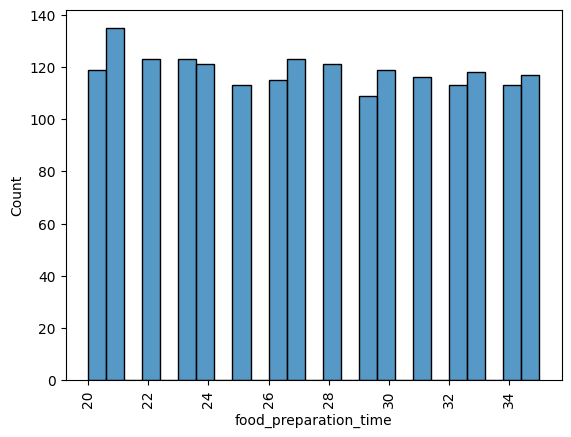

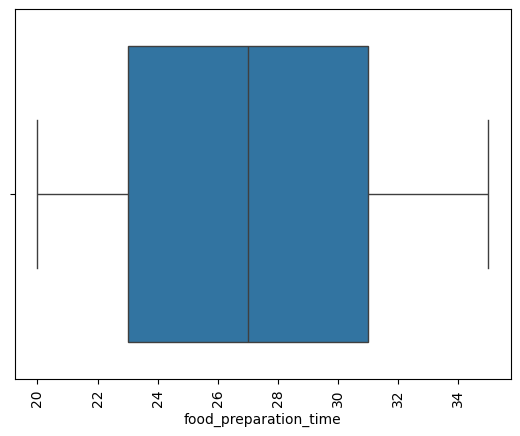

In [ ]:
####Food Preparation time

sns.histplot(data=orderdata,x='food_preparation_time', bins=25)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=orderdata,x='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

#####Observation:
Food preparation time tends to be within 23 to 30 minutes with a median of approximately 27 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Group by restaurant ID and count orders. Then display in descending order.
order_counts = orderdata.groupby('restaurant_name')['order_id'].count()
top5 = order_counts.sort_values(ascending = False).head(5)
print(top5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### **Observations:**
**Rankings are as follows:**

1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm

It is worth noting that there are some restaurants that are very similarly named, like "Vanessa's Dumplings" and "Vanessa's Dumpling House." If I were doing this analysis for my own company, I would probably do some extra research and cleaning on these restaurant names. As I have no way to know this for the purpose of this exercise, I am assuming that a different name is a different restaurant or location.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#group by day of the week, then cuisine. Count orders.
weekend_counts = orderdata.groupby(['day_of_the_week','cuisine_type'])['order_id'].count()
top_weekend_cuisine = weekend_counts.loc['Weekend'].sort_values(ascending = False).head(5)
print(top_weekend_cuisine)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: order_id, dtype: int64


In [ ]:
#out of curiousity, let's look at weekdays, too.
weekday_counts = orderdata.groupby(['day_of_the_week','cuisine_type'])['order_id'].count()
top_weekday_cuisine = weekday_counts.loc['Weekday'].sort_values(ascending = False).head(5)
print(top_weekday_cuisine)

cuisine_type
American    169
Japanese    135
Italian      91
Chinese      52
Indian       24
Name: order_id, dtype: int64


#### **Observations:**

American is the most popular on weekends. For that matter, it is also the most popular on weekdays.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
orders_over_20=orderdata.loc[orderdata['cost_of_the_order'] > 20.00].shape[0]

total_orders = orderdata.shape[0]

print("Orders over $20.00:  ",orders_over_20,"\nTotal orders:  ",total_orders,"\nPercentage of orders over $20.00:  ",(orders_over_20/total_orders))

Orders over $20.00:   555 
Total orders:   1898 
Percentage of orders over $20.00:   0.2924130663856691


#### **Observations:**
29% of orders are over $20.00


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
orderdata['delivery_time'].mean()

24.161749209694417

#### **Observations:**
The mean delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Group by customer and count order ids. Then show the top 3 in descending order.
customer_counts = orderdata.groupby('customer_id')['order_id'].count()
top3 = customer_counts.sort_values(ascending = False).head(3)
print(top3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:
### **Top 3 customers are:**

52832 with 13 orders

47440 with 10 orders

83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


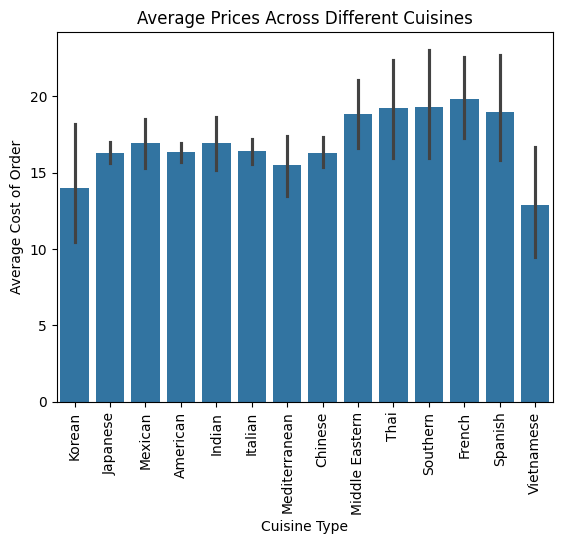

In [ ]:
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=orderdata, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Average Prices Across Different Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Order')
plt.show()


#####**Observation:**
American may be the most popular food in terms of order volume as shown in our previous analysis, but in terms of the average cost of order, Middle Eastern, Thai, Southern, French and Spanish have a higher average cost per order.

In [ ]:
# Convert 'day_of_the_week' to boolean where 'Weekend' is True and 'Weekday' is False
orderdata['day_of_week_bool'] = orderdata['day_of_the_week'].map({'Weekend': True, 'Weekday': False})

# Check the conversion
print(orderdata[['day_of_the_week', 'day_of_week_bool']].head())

  day_of_the_week  day_of_week_bool
0         Weekend              True
1         Weekend              True
2         Weekday             False
3         Weekend              True
4         Weekday             False


In [ ]:
# Replace NA values in the 'rating' column with 0 so that we can use it as a value for correlation. We'll add a new column so we don't lose the original data
orderdata['rating_converted'] = orderdata['rating'].fillna(0)

# Verify the changes
print(orderdata[['rating','rating_converted']])

      rating  rating_converted
0        NaN               0.0
1        NaN               0.0
2        5.0               5.0
3        3.0               3.0
4        4.0               4.0
...      ...               ...
1893     5.0               5.0
1894     5.0               5.0
1895     NaN               0.0
1896     5.0               5.0
1897     NaN               0.0

[1898 rows x 2 columns]


In [ ]:
#looking at correlation numerically
print(orderdata[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating','day_of_week_bool']].corr())

                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
rating                          0.033983              -0.006083   
day_of_week_bool                0.015960               0.021970   

                       delivery_time    rating  day_of_week_bool  
cost_of_the_order          -0.029949  0.033983          0.015960  
food_preparation_time       0.011094 -0.006083          0.021970  
delivery_time               1.000000 -0.009804         -0.534801  
rating                     -0.009804  1.000000          0.030727  
day_of_week_bool           -0.534801  0.030727          1.000000  


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

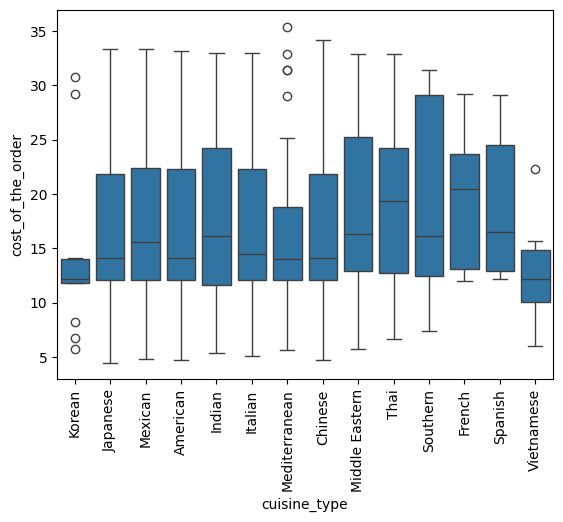

In [ ]:
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=orderdata)
plt.xticks(rotation=90)

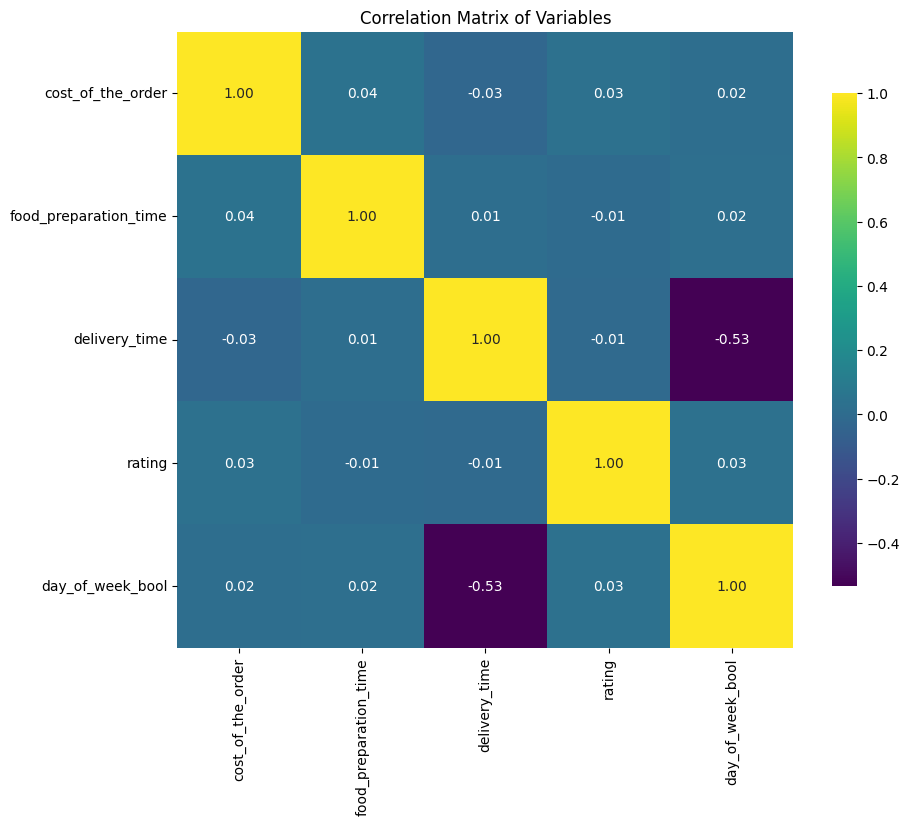

In [ ]:
# Correlation matrix of all variables
corrmatrix = orderdata[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating','day_of_week_bool']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Variables')
plt.show()

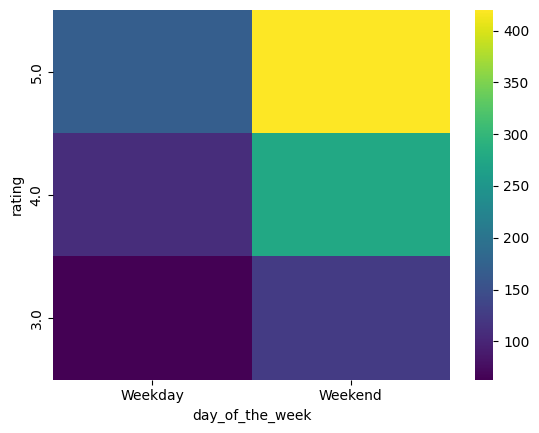

In [ ]:
# @title day_of_the_week vs rating
df_2dhist = pd.DataFrame({
    x_label: grp['rating'].value_counts()
    for x_label, grp in orderdata.groupby('day_of_the_week')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('day_of_the_week')
_ = plt.ylabel('rating')

([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

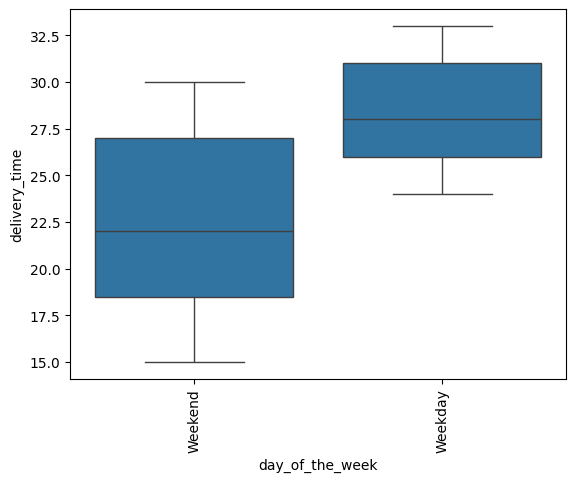

In [ ]:
sns.boxplot(x='day_of_the_week', y='delivery_time', data=orderdata)
plt.xticks(rotation=90)

#####**Observation**:
There are not a lot of strong correlations among the variables. There is some correlation between delivery time and day of week.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Group by 'restaurant_name', count 'order_id' and calculate mean 'rating'
# Let's convert the zeros back to nan so we don't skew the data by giving
# restaurants falsely low ratings
orderdata['rating'] =orderdata['rating'].replace(0, np.nan)

orderdata.info()
#note that we now have 1162 non-null ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   day_of_week_bool       1898 non-null   bool   
 10  rating_converted       1898 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 150.3+ KB


In [ ]:
# Sort the filtered DataFrame by 'rating' in descending order
restaurant_ratings = orderdata.groupby('restaurant_name').agg({
    'rating': ['count', 'mean']
})
restaurant_ratings.columns = ['rating_count', 'rating_mean']

# Filter restaurants with more than 50 ratings and an average rating greater than 4
filtered_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) &
                                          (restaurant_ratings['rating_mean'] > 4)]
print(filtered_restaurants)


                           rating_count  rating_mean
restaurant_name                                     
Blue Ribbon Fried Chicken            64     4.328125
Blue Ribbon Sushi                    73     4.219178
Shake Shack                         133     4.278195
The Meatball Shop                    84     4.511905


#### **Observations:**

Restaurants that fulfill the requirements are:

Blue Ribbon Fried Chicken           

Blue Ribbon Sushi                   

Shake Shack                        

The Meatball Shop                   


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#apply a 25% charge if order is over $20 and 15% charge if order is over $5 but less than $20
orderdata['revenue']= orderdata['cost_of_the_order'].apply(lambda cost: cost * 0.25 if cost > 20 else (cost * 0.15 if cost > 5 else 0))
#check calculations
orderdata.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,day_of_week_bool,rating_converted,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,True,0.0,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,True,0.0,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,False,5.0,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,True,3.0,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,False,4.0,1.7385
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24,False,3.0,6.3050
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21,True,0.0,0.9105
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30,False,3.0,0.8955
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26,False,5.0,2.4660
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26,False,5.0,1.0770


In [ ]:
print(orderdata['revenue'].sum())

6166.303


In [ ]:
print(orderdata['revenue'].groupby(orderdata['cuisine_type']).sum())

cuisine_type
American          1878.2740
Chinese            690.0405
French              76.1925
Indian             246.9940
Italian            966.8845
Japanese          1478.2445
Korean              33.3030
Mediterranean      136.3280
Mexican            256.6930
Middle Eastern     193.5535
Southern            68.7535
Spanish             47.2365
Thai                78.0525
Vietnamese          15.7530
Name: revenue, dtype: float64


#### **Observations**:
Total revenue is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Add prep time to delivery time to create a new column for total time. Then get the shape.
orderdata['total_time'] = orderdata['food_preparation_time']+orderdata['delivery_time']
orders_over_60_minutes = orderdata[orderdata['total_time']>60].shape[0]


In [ ]:
print(f"{orders_over_60_minutes / total_orders:.2%}")

10.54%


#### **Observations:**
10.54% of the orders have a total time to be delivered greater than 60 minutes.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
orderdata.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### **Observations**:
Weekday deliveries average approximately 28.3 minutes while weekend deliveries average 22.5 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## **Conclusions**:
*  People who use this service tend to gravitate towards less expensive American food. A close second in popularity is Japanese food.
*  There is a longer delivery time on weekdays than weekends.
*  There is a higher order volume on weekends.
*  The rating data was not very meaningful or useful in the analysis.

## **Recommendations:**

*  The business should look at the cause of the longer delivery times on weekdays and see what they can do to lower those times, whether that be hiring more drivers or finding more efficient ways to deliver.
*  Offer incentives to try something new, like Mediterranean or Thai with larger order costs to earn the higher revenue percentage and increase revenue.
*  Weekdays do not see as high a volume of sales as weekends. It may be worth exploring incentives or specials to boost weekday sales.
*  The business should try to gather more meaningful rating data so that it can more reliably explore the relationship between customer satisfaction and other variables like cost and delivery time. You could do this by offering coupons or other incentives for giving a rating.

---